In [16]:

from typing import Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from IPython.display import Image, display
import gradio as gr
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from pydantic import BaseModel
import random
from datetime import datetime



In [11]:
def add_value(left, right):
    if right is not None:
        return right
    return left

class State(BaseModel):
    name: Annotated[str, add_value] = ""
    greeting: Annotated[str, add_value] = ""
    timestamp: Annotated[str, add_value] = ""

In [3]:
load_dotenv(override=True)

True

In [4]:
graph_builder = StateGraph(State)

In [5]:
# Node 1: รับค่า name จาก state (ไม่ต้องอ่านจาก JSON)
def process_name(state: State):
    # name ถูกส่งมาจาก input แล้ว
    return {"name": state.name}

In [6]:
# Node 2: สร้างข้อความทักทาย
def create_greeting(state: State):
    greeting = f"Hello, {state.name}"
    return {"greeting": greeting}

In [7]:
# Node 3: ดึง Timestamp ปัจจุบัน
def get_timestamp(state: State):
    timestamp = datetime.now().isoformat()
    return {"timestamp": timestamp}

In [8]:
# Node 4: ส่งผลลัพธ์กลับ (ไม่ต้องบันทึก JSON)
def format_output(state: State):
    return state

In [19]:
# สร้าง graph โดยเพิ่ม nodes และกำหนด edges
graph_builder.add_node("process_name", process_name)
graph_builder.add_node("create_greeting", create_greeting)
graph_builder.add_node("get_timestamp", get_timestamp)
graph_builder.add_node("format_output", format_output)

# กำหนดลำดับการทำงาน
graph_builder.add_edge(START, "process_name")
graph_builder.add_edge("process_name", "create_greeting")
graph_builder.add_edge("create_greeting", "get_timestamp")
graph_builder.add_edge("get_timestamp", "format_output")
graph_builder.add_edge("format_output", END)

# Compile graph
graph = graph_builder.compile()

Adding a node to a graph that has already been compiled. This will not be reflected in the compiled graph.


ValueError: Node `process_name` already present.

In [23]:
def chat(user_input: str, history):
    state = State(name=user_input)
    result = graph.invoke(state)
    print(result)
    return result["greeting"] + " " + result["timestamp"]


gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7868
* To create a public link, set `share=True` in `launch()`.


{'name': 'Wirat', 'greeting': 'Hello, Wirat', 'timestamp': '2025-12-10T21:05:30.844356'}


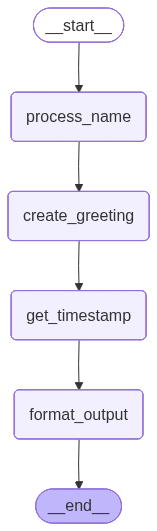

Traceback (most recent call last):
  File "d:\Demo\agents\LangGraphPractice\.venv\Lib\site-packages\gradio\queueing.py", line 763, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
    )
    ^
  File "d:\Demo\agents\LangGraphPractice\.venv\Lib\site-packages\gradio\route_utils.py", line 354, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<11 lines>...
    )
    ^
  File "d:\Demo\agents\LangGraphPractice\.venv\Lib\site-packages\gradio\blocks.py", line 2106, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<8 lines>...
    )
    ^
  File "d:\Demo\agents\LangGraphPractice\.venv\Lib\site-packages\gradio\blocks.py", line 1586, in call_function
    prediction = await fn(*processed_input)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Demo\agents\LangGraphPractice\.venv\

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [23]:
import gradio as gr
print(gr.__version__)

5.33.1
